In [1]:
# getting the required datasets for analysis
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#extracting the dataset for analysis
df = pd.read_excel('et.xlsx')
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2285,0.71,0.50,4,253,3,0,0,0,RandD,medium
3719,0.57,0.45,3,189,2,0,0,0,technical,medium
10745,0.84,0.86,3,199,3,0,0,0,IT,medium
13435,0.71,0.54,4,188,6,0,0,0,technical,low
249,0.11,0.84,6,298,4,0,1,0,sales,low
9125,0.81,0.97,3,133,3,0,0,0,technical,medium
14401,0.09,0.80,7,283,5,0,1,0,technical,low
310,0.10,0.93,7,305,4,0,1,0,technical,medium
5640,0.21,0.76,4,165,6,1,0,0,product_mng,low
7499,0.93,0.58,5,238,2,0,0,0,sales,medium


In [3]:
#getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

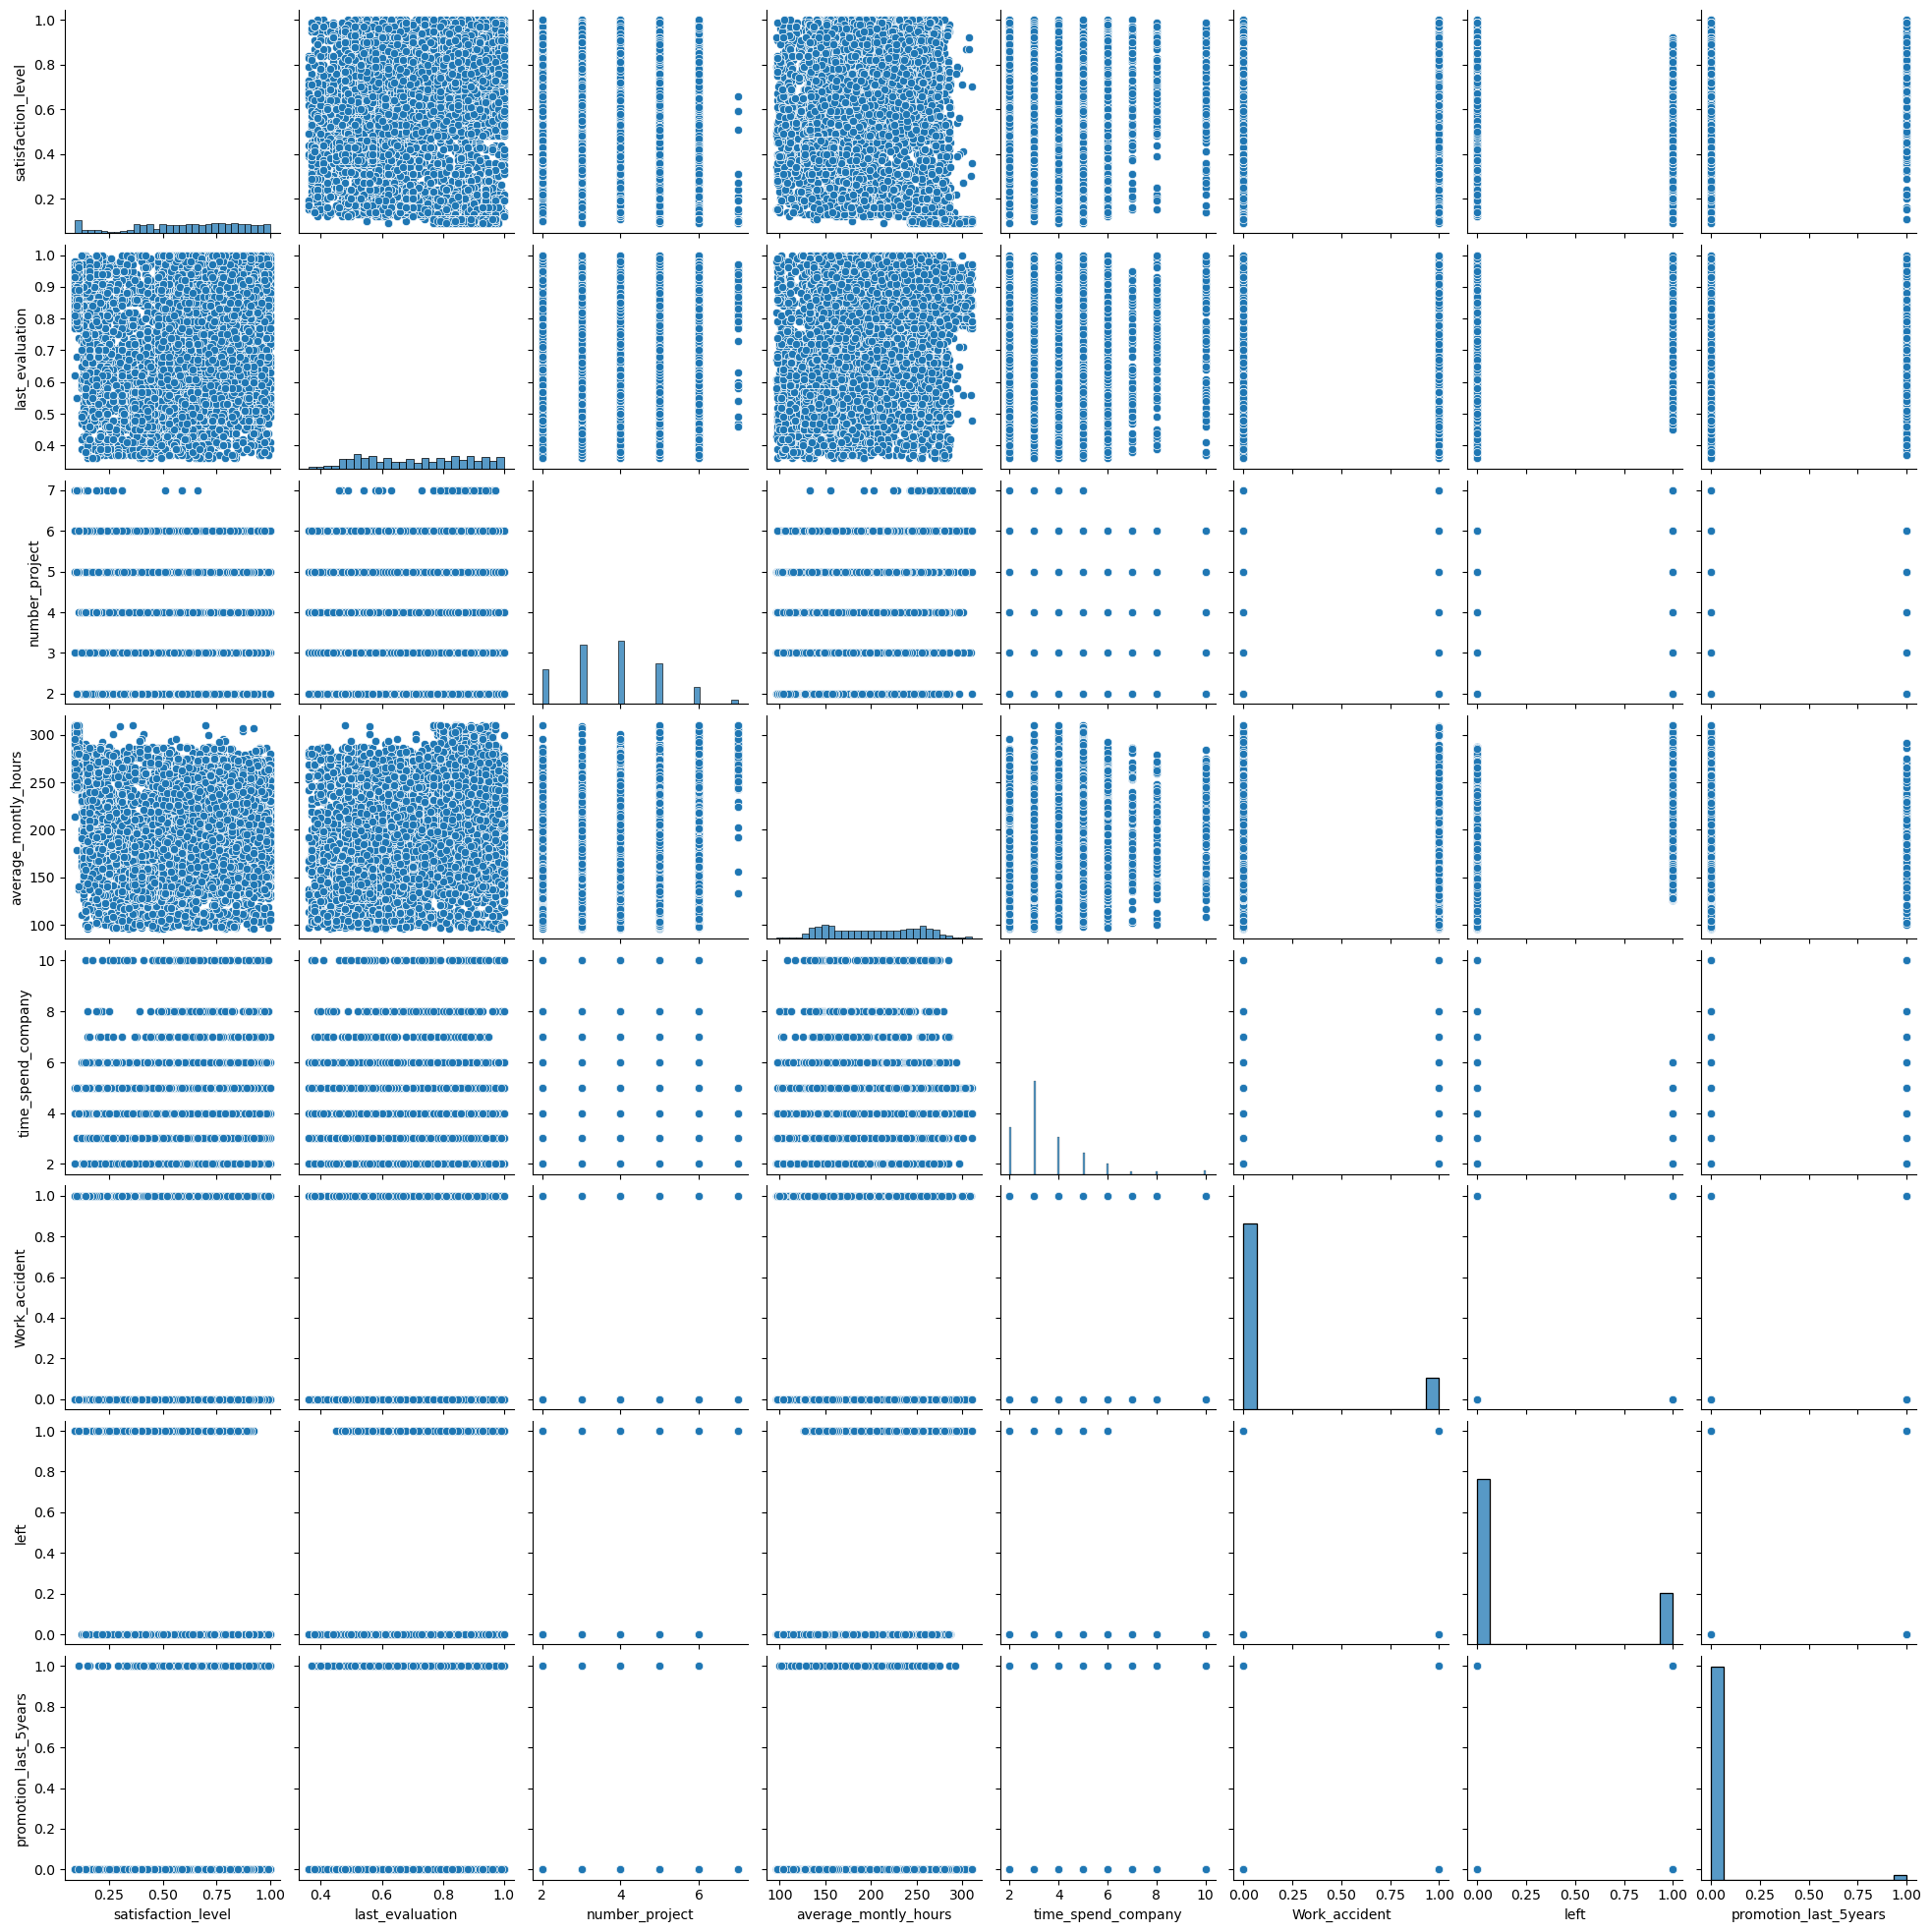

In [4]:
##analyzing the dataset using plots
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [5]:
#applying one hot encoder to our dataset for statistical analysis
# import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
data = df.copy()

# Select categorical columns to be one-hot encoded
categorical_cols = ['sales', 'salary']

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # sparse=False for dense array output, drop='first' to drop first column to avoid multicollinearity

# Fit and transform the categorical columns
onehot_encoded = onehot_encoder.fit_transform(data[categorical_cols])

# Convert the encoded array into a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names(categorical_cols))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data_encoded = pd.concat([data.drop(categorical_cols, axis=1), onehot_encoded_df], axis=1)

# # Display the encoded DataFrame
# data_encoded


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
data_encoded.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
4582,0.91,0.51,2,211,2,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
493,0.10,0.94,6,309,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4701,0.28,0.76,3,150,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5153,0.82,0.92,5,198,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12037,0.45,0.50,2,126,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3450,0.89,0.58,4,232,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11904,0.16,0.68,5,149,7,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,0.62,0.64,4,185,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2812,0.37,0.43,2,155,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
##trying to apply label encoding on the same as well once
# copying the data 
data1 = df.copy()
data1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
#applying label encoder
from sklearn.preprocessing import LabelEncoder

# Select categorical columns to be label encoded
categorical_cols = ['sales', 'salary']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data1[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Display the encoded DataFrame
print(data1)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [9]:
##renaming a column in the dataset
data1.rename(columns={'sales_encoded': 'roles_encoded'}, inplace=True)

In [11]:
data1.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,roles_encoded,salary_encoded
7429,0.76,0.58,3,262,2,0,0,0,sales,low,7,1
9857,0.54,0.87,4,163,3,0,0,0,sales,medium,7,2
7168,0.92,0.68,5,210,2,0,0,0,product_mng,low,6,1
637,0.43,0.52,2,147,3,0,1,0,sales,low,7,1
4015,0.14,0.68,5,253,5,0,0,0,support,low,8,1
4193,0.81,0.90,4,165,3,0,0,0,RandD,medium,1,2
710,0.64,0.90,6,252,2,0,1,0,sales,low,7,1
5298,0.21,0.85,5,153,3,0,0,0,hr,low,3,1
593,0.37,0.54,2,132,3,0,1,0,technical,low,9,1
5747,0.60,0.81,3,226,2,0,0,0,sales,medium,7,2


In [14]:
#dropping the two columns of our choice to keep the data numerical 
# Drop multiple columns
data1.drop(columns=['sales', 'salary'], inplace=True)

In [15]:
data1.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,roles_encoded,salary_encoded
1592,0.41,0.57,2,154,3,0,1,0,0,2
14502,0.87,0.84,5,231,5,0,1,0,0,1
1098,0.42,0.48,2,132,3,0,1,0,3,1
3531,0.90,0.74,4,218,2,1,0,0,7,2
11436,0.77,0.71,5,250,3,1,0,0,7,2
11492,0.77,0.49,2,286,7,0,0,0,5,1
7039,0.81,0.45,6,98,3,0,0,0,7,1
5703,0.81,0.55,3,127,4,0,0,0,8,2
1412,0.46,0.46,2,140,3,0,1,0,9,1
7060,0.84,0.62,4,152,3,0,0,0,9,2


In [16]:
## getting the correlation of the dataset
corr = data1.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,roles_encoded,salary_encoded
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
roles_encoded,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary_encoded,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


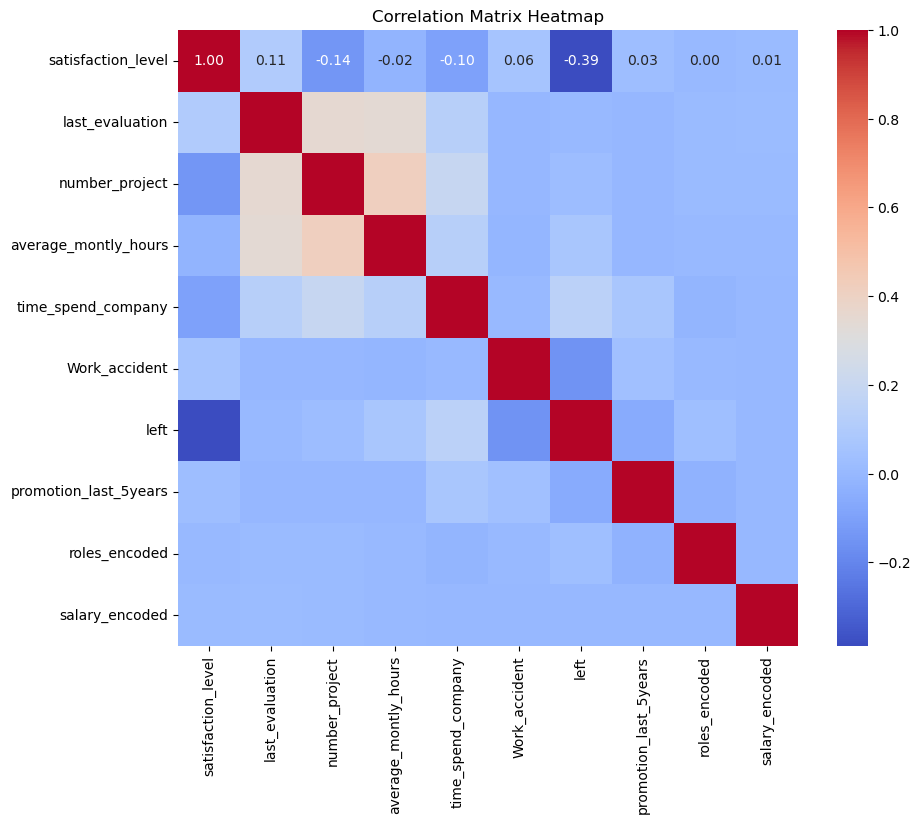

In [19]:
#plotting the correlation in a heatmap 
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


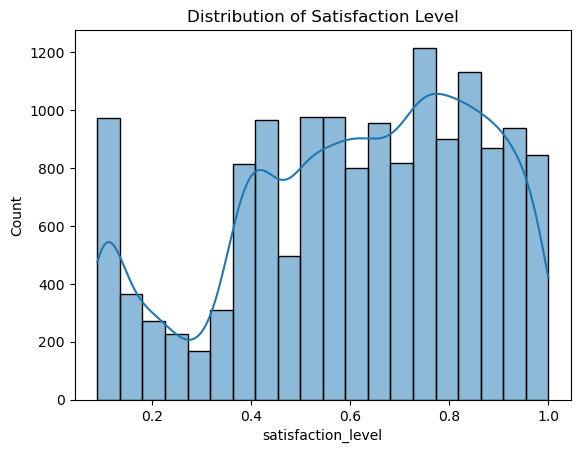

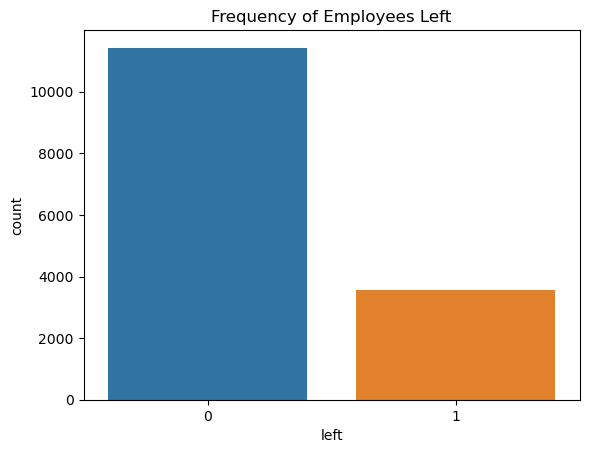

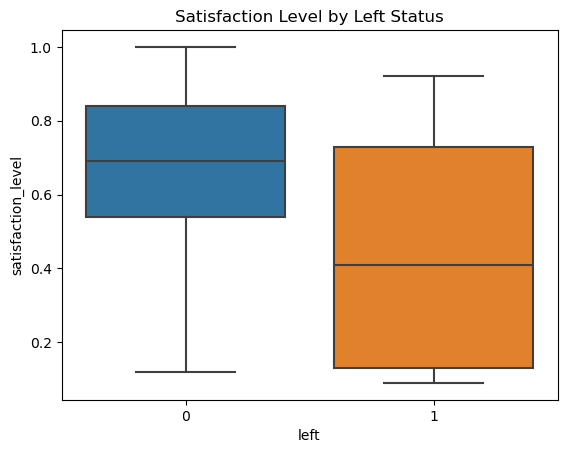

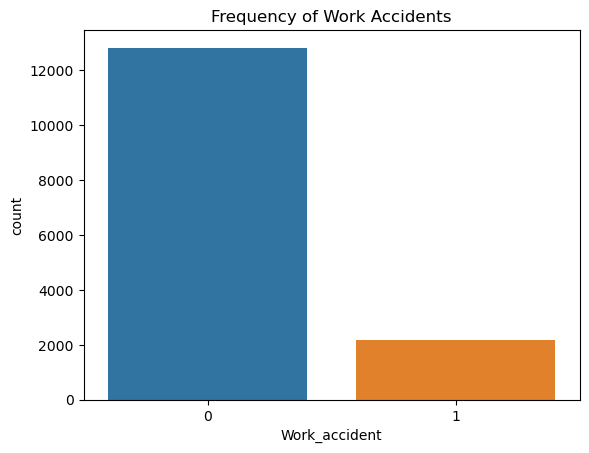

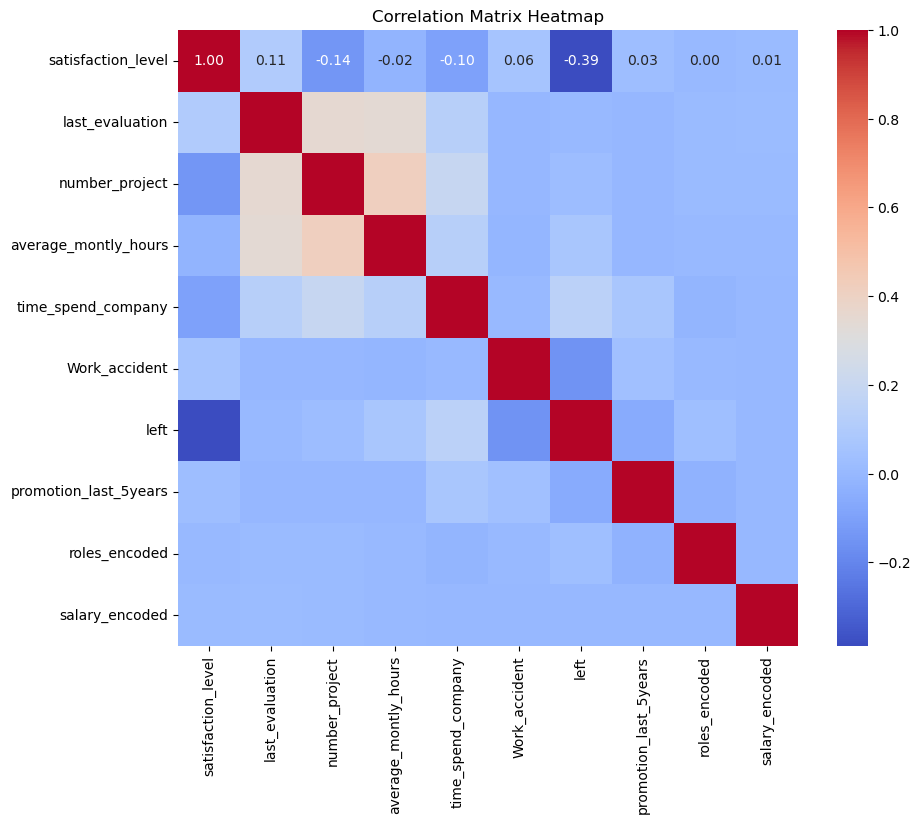

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

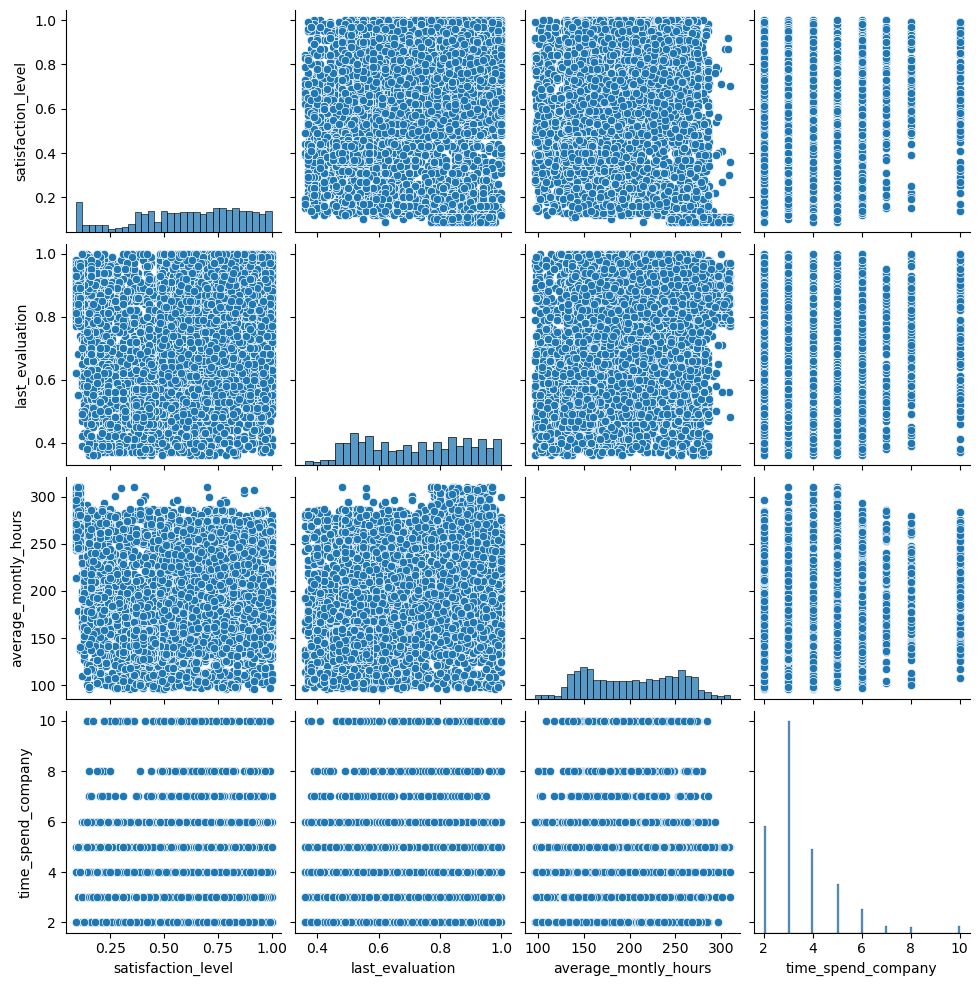

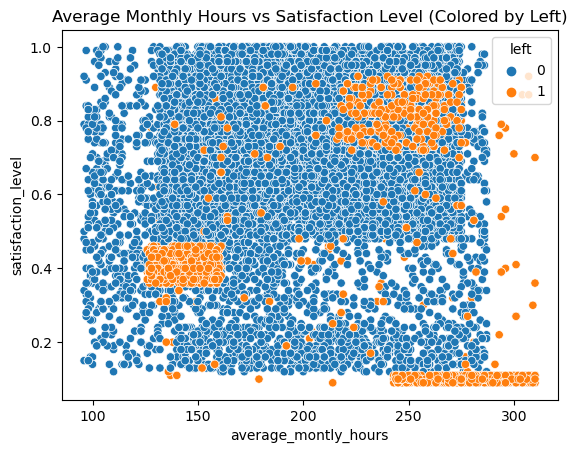

In [20]:
# Histograms
sns.histplot(data1['satisfaction_level'], bins=20, kde=True)
plt.title('Distribution of Satisfaction Level')
plt.show()

# Bar plots
sns.countplot(x='left', data=data1)
plt.title('Frequency of Employees Left')
plt.show()

# Box plots
sns.boxplot(x='left', y='satisfaction_level', data=data1)
plt.title('Satisfaction Level by Left Status')
plt.show()

# Count plots
sns.countplot(x='Work_accident', data=data1)
plt.title('Frequency of Work Accidents')
plt.show()

# Correlation heatmap
corr_matrix = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair plots
sns.pairplot(data1[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']])
plt.show()

# Scatter plots
sns.scatterplot(x='average_montly_hours', y='satisfaction_level', hue='left', data=data1)
plt.title('Average Monthly Hours vs Satisfaction Level (Colored by Left)')
plt.show()


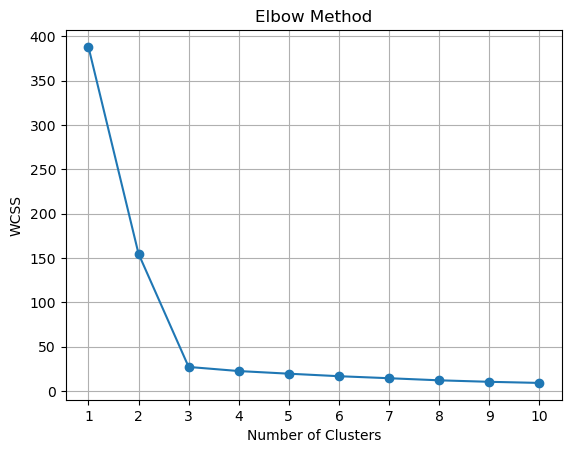

In [26]:
#Applying k-means clustering to understand the Employees who left based on their satisfaction and evaluation.
from sklearn.cluster import KMeans

#Filter data for employees who left
left_df = data1[data1['left'] == 1]

# Select relevant features (satisfaction and evaluation)
X = left_df[['satisfaction_level', 'last_evaluation']]

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to determine optimal number of clusters
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)

/var/folders/7g/1nszm66114x9tyrwz6hhhykc0000gn/T/ipykernel_2175/101222178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df['cluster'] = cluster_labels


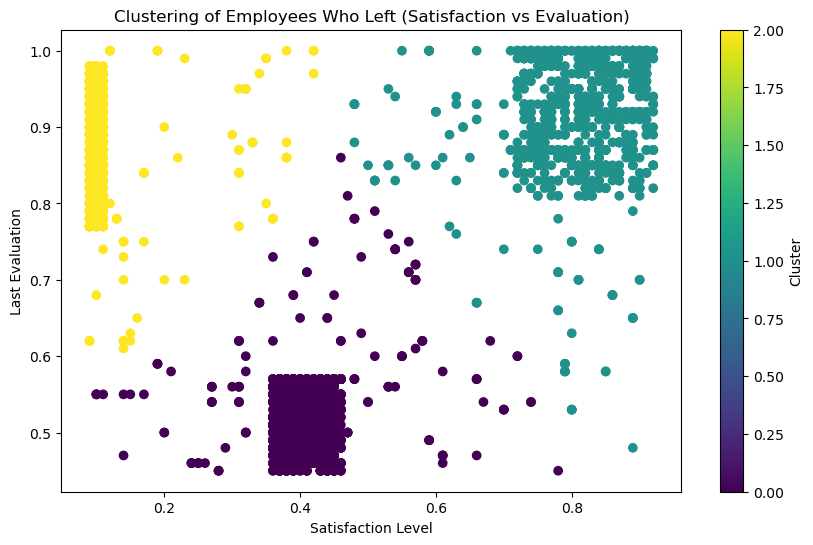

In [27]:
# Based on the Elbow method, choose the optimal number of clusters
k = 3  # Adjust this value based on the Elbow method plot

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
left_df['cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['satisfaction_level'], X['last_evaluation'], c=cluster_labels, cmap='viridis')
plt.title('Clustering of Employees Who Left (Satisfaction vs Evaluation)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
#installing the imbalanced learn package 
!pip install imbalanced-learn

In [31]:
# Using the SMOTE technique to handle the left class imbalance
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = data1.drop('left', axis=1)
y = data1['left']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution before SMOTE:
left
0    11428
1     3571
Name: count, dtype: int64

Class distribution after SMOTE:
left
1    11428
0    11428
Name: count, dtype: int64


In [32]:
# Perform k-fold cross-validation model training and evaluate performance.
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [33]:
# Separate features (X) and target variable (y)
X = data1.drop('left', axis=1)
y = data1['left']

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_classifier)
])

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.984      0.99066667 0.98833333 0.98966667 0.98899633]
Mean accuracy: 0.988332599755474


#### we can see that the mean accuracy obtained here is 98% which means that the model stands fine for any kind of unseen data in future

In [36]:
## getting the right model fit 
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define candidate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    results[name] = cv_results

# Compare performance of models
for name, result in results.items():
    print(f"Model: {name}")
    print("Mean performance across folds:")
    for metric in scoring:
        mean_score = result[f'test_{metric}'].mean()
        print(f"{metric}: {mean_score:.3f}")
    print()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Model: Logistic Regression
Mean performance across folds:
accuracy: 0.769
precision: 0.533
recall: 0.249
f1: 0.339
roc_auc: 0.803

Model: Random Forest
Mean performance across folds:
accuracy: 0.992
precision: 0.995
recall: 0.970
f1: 0.982
roc_auc: 0.993

Model: Gradient Boosting
Mean performance across folds:
accuracy: 0.976
precision: 0.967
recall: 0.930
f1: 0.948
roc_auc: 0.988



#### As we can see that Random Forest model has better model accuracy and evaluation metrics, it stands out as the right approach to solving the problem.


In [37]:
# We will now apply random forest algorithm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = data1.drop('left', axis=1)
y = data1['left']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2285    9]
 [  26  680]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

